# Libraries

In [1]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data Information

In [2]:
train_file_id = '1zf7-5OIQAw-k8_iwPyqmyeegQ1G31oY5'
train_output_file = 'Dataset2/Food Calories Estimation.csv'

train_download_url = f'https://drive.google.com/uc?id={train_file_id}'

gdown.download(train_download_url, train_output_file, quiet=False)

df = pd.read_csv(train_output_file)

Downloading...
From: https://drive.google.com/uc?id=1zf7-5OIQAw-k8_iwPyqmyeegQ1G31oY5
To: c:\Users\firma\Documents\Python\Bangkit\Food Calories Estimation\Dataset2\Food Calories Estimation.csv
100%|██████████| 2.48M/2.48M [00:01<00:00, 1.96MB/s]


In [3]:
df.head()

,index,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,...,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,...,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,...,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0
3,3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,...,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
4,4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,...,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              8790 non-null   int64  
 1   NDB_No             8790 non-null   int64  
 2   Shrt_Desc          8790 non-null   object 
 3   Water_(g)          8789 non-null   float64
 4   Energ_Kcal         8790 non-null   int64  
 5   Protein_(g)        8790 non-null   float64
 6   Lipid_Tot_(g)      8790 non-null   float64
 7   Ash_(g)            8465 non-null   float64
 8   Carbohydrt_(g)     8790 non-null   float64
 9   Fiber_TD_(g)       8196 non-null   float64
 10  Sugar_Tot_(g)      6958 non-null   float64
 11  Calcium_(mg)       8442 non-null   float64
 12  Iron_(mg)          8646 non-null   float64
 13  Magnesium_(mg)     8051 non-null   float64
 14  Phosphorus_(mg)    8211 non-null   float64
 15  Potassium_(mg)     8364 non-null   float64
 16  Sodium_(mg)        8707 

# Data Cleaning

## Choose Best Features

In [5]:
df = df[['Shrt_Desc', 'Water_(g)', 'Energ_Kcal','Protein_(g)', 'Lipid_Tot_(g)',
         'Ash_(g)', 'Carbohydrt_(g)','Fiber_TD_(g)', 'Sugar_Tot_(g)']]
df.head()

,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g)
0,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06
1,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06
2,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00
3,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50
4,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51


In [6]:
df.isnull().sum()

Shrt_Desc            0
Water_(g)            1
Energ_Kcal           0
Protein_(g)          0
Lipid_Tot_(g)        0
Ash_(g)            325
Carbohydrt_(g)       0
Fiber_TD_(g)       594
Sugar_Tot_(g)     1832
dtype: int64

## Mussing Values

In [7]:
columns_to_fill = ['Ash_(g)','Water_(g)','Fiber_TD_(g)', 'Sugar_Tot_(g)']
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].median())
df.head()

,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g)
0,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06
1,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06
2,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00
3,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50
4,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51


# Data Preprocessing

## Scaler

In [8]:
# columns_to_scaler = [col for col in df.columns if col not in ['Shrt_Desc']]
# scaler = MinMaxScaler()
# df[columns_to_scaler] = scaler.fit_transform(df[columns_to_scaler])
# df.head()

# Modeling

## Train Test Split

In [9]:
features = [col for col in df.columns if col not in ['Energ_Kcal', 'Shrt_Desc']]
target = 'Energ_Kcal'

X = df[features]
y = df[target]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

## CNN_Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    
    tf.keras.layers.Dense(256),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(negative_slope=0.1),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(negative_slope=0.1),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(negative_slope=0.1),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(32, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='relu')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='mean_squared_error',
    metrics=['mae']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,105 (184.00 KB)

 Trainable params: 46,209 (180.50 KB)

 Non-trainable params: 896 (3.50 KB)

In [12]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=0.001, verbose=1
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True, verbose=1
)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.keras', monitor='val_loss', save_best_only=True, verbose=1
)

history = model.fit(
    X_train, y_train,
    epochs=100,  
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[reduce_lr]  
)

Epoch 1/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 78363.1484 - mae: 224.3113 - val_loss: 47827.9805 - val_mae: 189.1000 - learning_rate: 5.0000e-04
Epoch 2/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 42436.3281 - mae: 172.3673 - val_loss: 12803.2754 - val_mae: 104.0765 - learning_rate: 5.0000e-04
Epoch 3/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10179.9277 - mae: 84.0969 - val_loss: 3768.3872 - val_mae: 48.0403 - learning_rate: 5.0000e-04
Epoch 4/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3723.5989 - mae: 47.6345 - val_loss: 1021.8674 - val_mae: 25.6282 - learning_rate: 5.0000e-04
Epoch 5/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3303.3425 - mae: 41.6522 - val_loss: 359.9255 - val_mae: 14.7280 - learning_rate: 5.0000e-04
Epoch 6/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2682.6384 - mae: 37.2466 - val_loss: 259.9093 - val_mae: 11.6379 - learning_rate: 5.0000e-04
Epoch 7/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30

# Model Evaluation

In [13]:
y_pred = model.predict(X_test)

y_pred = y_pred.flatten()
y_test = y_test.to_numpy().flatten()

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 11.018303175699453
MSE: 278.781980483152


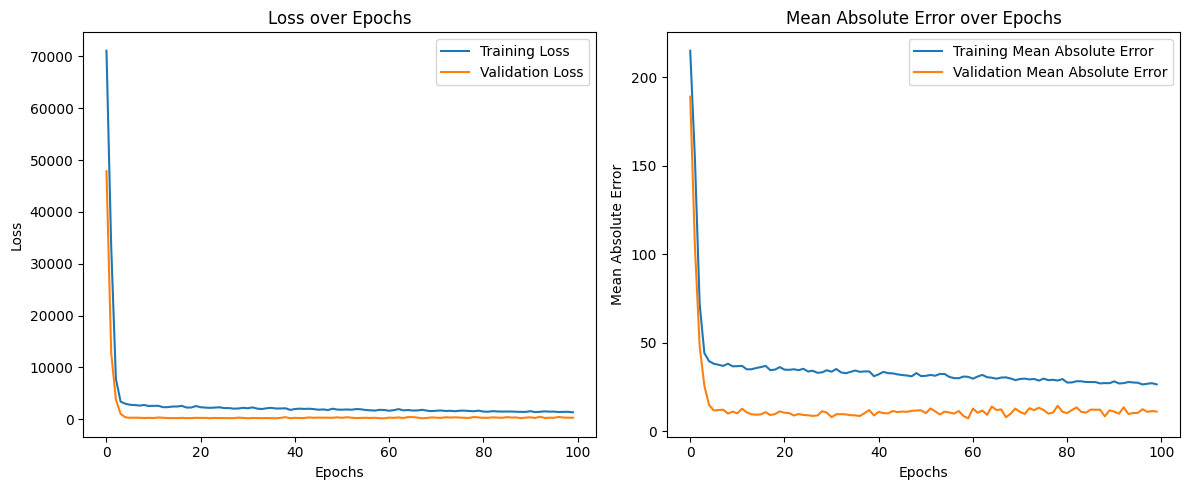

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, metric, title in zip(axes.flatten(), ['loss', 'mae'], ['Loss', 'Mean Absolute Error']):
    ax.plot(history.history[metric], label=f'Training {title}')
    ax.plot(history.history[f'val_{metric}'], label=f'Validation {title}')
    ax.set_title(f'{title} over Epochs')
    ax.set_xlabel('Epochs')
    ax.set_ylabel(title)
    ax.legend()
    
plt.tight_layout()
plt.show()

# Save Model

In [15]:
model.save('Model Checkpoint/Food_Calories_Prediction model.h5')

In [16]:
model_json = model.to_json()

with open('Model Checkpoint/food_calories_prediction_model_architecture.json', 'w') as json_file:
    json_file.write(model_json)

print("Model architecture has been saved as JSON.")

Model architecture has been saved as JSON.


In [17]:
weights = model.get_weights()

with open('Model Checkpoint/food_calories_prediction_model_weights.bin', 'wb') as bin_file:
    for weight_array in weights:
        weight_array.astype(np.float32).tofile(bin_file)

print("Model weights have been saved as .bin.")

Model weights have been saved as .bin.
